<a href="https://colab.research.google.com/github/hch507/president_height-analysis/blob/main/president_height.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
myfile=files.upload()

Saving president_heights.csv to president_heights.csv


In [30]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv(io.BytesIO(myfile['president_heights.csv']),index_col =0)


In [4]:
df.head()
df.tail()

,name,height(cm)
order,,
40,Ronald Reagan,185
41,George H. W. Bush,188
42,Bill Clinton,188
43,George W. Bush,182
44,Barack Obama,185


In [5]:
df.shape

(42, 2)

In [6]:
df.dtypes

name          object
height(cm)     int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 44
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        42 non-null     object
 1   height(cm)  42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1008.0+ bytes


In [8]:
# 데이터 전처리

df.rename( columns = { "height(cm)":"height"}, inplace=True)# 변수 이름 변경
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    42 non-null     object
 1   height  42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1008.0+ bytes


In [9]:
# 결측치 확인

df.isnull().sum( axis = 0)# 열의 결측치(null) 갯수


name      0
height    0
dtype: int64

In [10]:
# 중복 데이터 확인

df.duplicated().sum( axis =0)

0

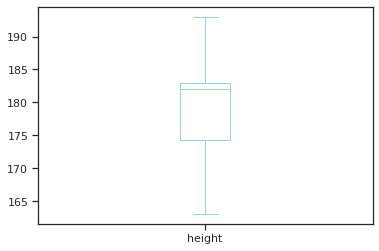

In [11]:
#이상치 확인(데이터 분포)

sns.set_theme( style ='ticks',palette = 'pastel')

df['height'].plot (kind ="box")

In [12]:
## EDA
df

,name,height
order,,
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163
5,James Monroe,183
6,John Quincy Adams,171
7,Andrew Jackson,185
8,Martin Van Buren,168
9,William Henry Harrison,173


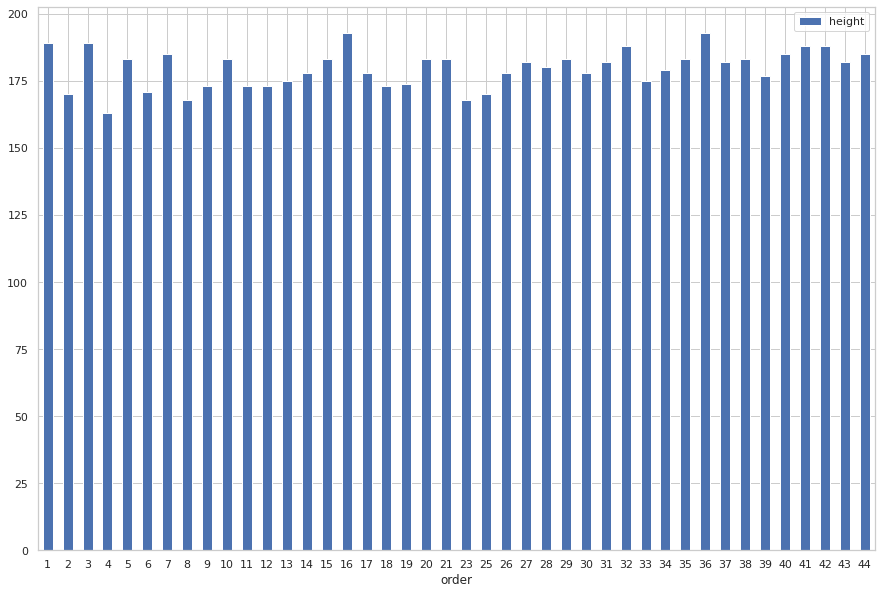

In [20]:
#시각화 
sns.set_theme( style = 'whitegrid')

ax=df.plot(kind = 'bar', figsize = (15,10))
ax.set_xticklabels(df.index, rotation=0)

plt.show()

In [22]:
### 신장 내림차순
df_sort = df.sort_values(by = 'height', ascending = False)
df_sort

,name,height
order,,
16,Abraham Lincoln,193
36,Lyndon B. Johnson,193
1,George Washington,189
3,Thomas Jefferson,189
42,Bill Clinton,188
41,George H. W. Bush,188
32,Franklin D. Roosevelt,188
40,Ronald Reagan,185
44,Barack Obama,185


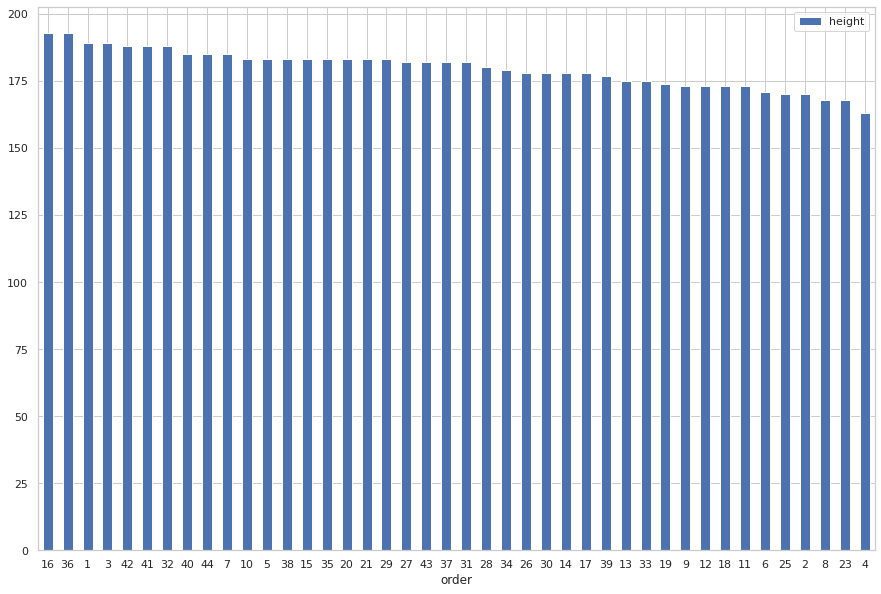

In [25]:
sns.set_theme( style = 'whitegrid')

ax=df_sort.plot(kind = 'bar', figsize = (15,10))
ax.set_xticklabels(df_sort.index, rotation=0)

plt.show()

In [26]:
# 신장 정보 요약
df.describe()

,height
count,42.000000
mean,179.738095
std,7.015869
min,163.000000
25%,174.250000
50%,182.000000
75%,183.000000
max,193.000000


In [28]:
# 제일 작은 대통령
mask = df['height']<=df['height'].min()
height_min = df[mask]
height_min

,name,height
order,,
4,James Madison,163


In [31]:
#구간 분할
count, bin_dividers = np.histogram(df['height'], bins = 4)
print("역대 대통령 4구간 분할")
print(f'구간별 인원수 {count}|t 구간 경계 : {bin_dividers}')


역대 대통령 4구간 분할
구간별 인원수 [ 5  9 21  7]|t 구간 경계 : [163.  170.5 178.  185.5 193. ]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


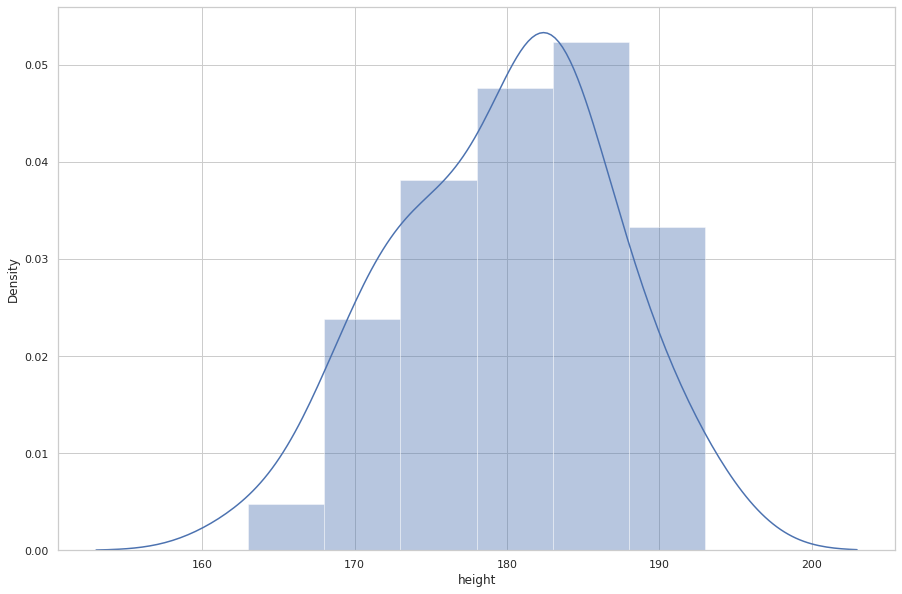

In [33]:
sns.set_theme( style = 'whitegrid')

plt.figure( figsize = (15,10))

sns.distplot(df['height'], kde = True)


In [35]:
# 평균 신장 
mean_height = df.height.mean()
print(f'미국 역대 대통령 평균 신장 :{round(mean_height,2)}cm')

미국 역대 대통령 평균 신장 :179.74cm


In [38]:
# 평균 미만
mean_height_under = df.loc[df.height< mean_height]
mean_height_under.sort_values(by = 'height')


,name,height
order,,
4,James Madison,163
8,Martin Van Buren,168
23,Benjamin Harrison,168
2,John Adams,170
25,William McKinley,170
6,John Quincy Adams,171
9,William Henry Harrison,173
11,James K. Polk,173
12,Zachary Taylor,173


In [39]:
print(f'총 {mean_height_under.height.count()}명입니다')

총 19명입니다


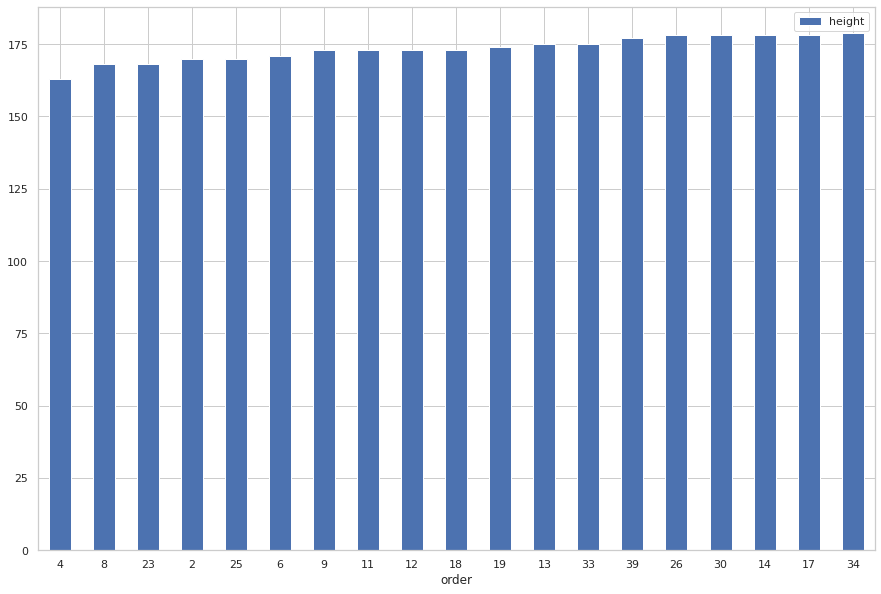

In [40]:
sns.set_theme( style = 'whitegrid')

mean_height_under_sort=mean_height_under.sort_values(by = 'height')
ax=mean_height_under_sort.plot(kind = 'bar', figsize = (15,10))
ax.set_xticklabels(mean_height_under_sort.index, rotation=0)

plt.show()

In [42]:
#신장별 인원수
height_s = df['height'].value_counts()
height_s 

183    8
178    4
182    4
173    4
188    3
185    3
189    2
193    2
175    2
170    2
168    2
174    1
171    1
180    1
163    1
179    1
177    1
Name: height, dtype: int64